 ## Importing necessary libraries

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from pandasql import sqldf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the datasets

In [448]:
df1 = pd.read_csv("Table S1.csv", skiprows=1, header = 0)
df2 = pd.read_csv("Table S2.csv", skiprows=1, header = 0)
df3 = pd.read_csv("Table S3.csv", skiprows=1, header = 0)

In [449]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(2988, 28)
(418, 24)
(52, 25)


### Checking for class imbalance

In [450]:
df1['Comment'].value_counts()

Comment
Barren       1687
Fertility    1301
Name: count, dtype: int64

In [451]:
# sampling the data
df1.sample(3)

,CITATION,LOCATION,LATITUDE (MIN.),LONGITUDE (MIN.),ROCK NAME,AGE(MA),Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
2503,"Loader et al., 2017",Heruga,NaN,NaN,Zircon_OT-36_3_1,370.000000,42.0,Fertility,1,12.11058,...,81.495789,31.383886,147.04747,38.148788,425.169037,66.319847,965.393433,7666.389648,68.321968,37.332386
839,[22019] HEINONEN A. P. (2017),BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PRO...,60.3495,27.4575,"GRANITE, RAPAKIVI",1634.245169,NaN,Barren,0,10.64000,...,83.750000,32.180000,156.06000,32.590000,298.390000,53.090000,918.730000,13031.500000,124.338648,80.483296
1967,Shen et al. 2015,Erdenet,NaN,NaN,Gr-5,240.000000,11.0,Fertility,1,9.90000,...,48.700000,19.200000,NaN,NaN,204.000000,40.000000,571.000000,9260.000000,82.000000,59.000000


In [452]:
# Prints the columns present in the dataframe
df1.columns

Index(['CITATION', 'LOCATION', 'LATITUDE (MIN.)', 'LONGITUDE (MIN.)',
       'ROCK NAME', 'AGE(MA)', 'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti',
       'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
       'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [453]:
df2.columns

Index(['Sample No.', 'Rock type', 'Zricon ID', 'Age', 'Ti', 'Ce', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'Ce_zhong', 'Eu_zhong', 'Eu_Zhong/Y', 'Ce/Nd', '(Ce/Nd)/Y'],
      dtype='object')

In [454]:
df2.sample(3)

,Sample No.,Rock type,Zricon ID,Age,Ti,Ce,Nd,Sm,Eu,Gd,...,Tm,Yb,Lu,Y,Hf,Ce_zhong,Eu_zhong,Eu_Zhong/Y,Ce/Nd,(Ce/Nd)/Y
334,SM061,Salt & pepper Bethsaida,RLP1L7-5,208.15,2.0,15.60,0.46,1.93,0.369,17.00,...,62.50,634.0,140.10,1712.0,9940,2814.036338,0.167730,0.000098,33.913043,0.019809
390,MA026,Chataway sub-facies,RLP1L5-14D,210.51,8.1,7.74,0.28,1.09,0.398,5.66,...,12.61,125.7,30.14,359.2,10487,1096.728949,0.480429,0.001337,27.642857,0.076957
145,SB123,Border facies,RLP2L8-13,211.02,10.1,11.75,0.45,1.61,0.498,8.91,...,16.32,150.7,30.37,454.8,9460,782.082044,0.398886,0.000877,26.111111,0.057412


In [455]:
df3.columns

Index(['Sample', 'Analysis number', 'Location', 'Age (Ma)', 'Ti', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'Ce_zhong', 'Eu_zhong', 'Eu_Zhong/Y', 'Ce/Nd', '(Ce/Nd)/Y'],
      dtype='object')

In [456]:
df3.sample(3)

,Sample,Analysis number,Location,Age (Ma),Ti,Ce,Pr,Nd,Sm,Eu,...,Tm,Yb,Lu,Y,Hf,Ce_zhong,Eu_zhong,Eu_Zhong/Y,Ce/Nd,(Ce/Nd)/Y
28,PZ11-03,PZ11-03_1,Xigaze,17,5.111796,10.07,0.0440,1.097,3.715,2.350,...,53.37,540.5,98.76,1677.0,11118.726840,374.815966,0.682646,0.000407,9.179581,0.005474
40,JR11-06,JR11-06_9,Jiru,16,4.945778,120.60,0.2985,4.641,9.949,3.874,...,49.42,442.2,64.71,1584.0,9039.477435,345.535383,0.528370,0.000334,25.985779,0.016405
51,JR-5,JR5_5,Jiru,16,3.988028,51.73,0.1839,4.727,10.450,4.390,...,54.63,473.3,69.66,1955.0,7134.064133,151.459455,0.594245,0.000304,10.943516,0.005598


### Analysing the column Sample No in dataframes 2 and 3.

In [457]:
df2['Sample No.'].value_counts()

Sample No.
MA026    57
SM060    46
SM061    39
MA121    30
SM056    29
SB123    28
SM057    27
SM058    25
MA038    23
SB217    23
MA099    22
SB218    21
SM055    20
SM059    18
KB132    10
Name: count, dtype: int64

In [458]:
df3['Sample'].value_counts()

Sample
PZ11-03     9
PG11-03     6
NM11-01     5
WR-12-11    5
KMQ-12-2    5
JM11-36     5
PG11-06     5
JR11-06     4
QS-11       3
JR-2        3
JR-5        2
Name: count, dtype: int64

### Working with dataframe 1

In [459]:
# Print the first 5 rows of the dataframe
df1.head()

,CITATION,LOCATION,LATITUDE (MIN.),LONGITUDE (MIN.),ROCK NAME,AGE(MA),Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,7.88,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,10.90,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,6.00,...,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,9.06,...,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,4.93,...,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [460]:
### Number of Cu deposits based on location

In [461]:
#group_by_loc = sqldf(""" SELECT LOCATION AS location, COUNT(*) AS num_deposits FROM df1 GROUP BY LOCATION ORDER BY LOCATION """)

In [462]:
import pandas as pd

# Assuming df1 is your DataFrame
# Here's how you can achieve the same functionality using pandas
group_by_loc = df1.groupby('LOCATION').size().reset_index(name='num_deposits').sort_values(by='LOCATION')

print(group_by_loc)


                                             LOCATION  num_deposits
0   ALEUTIAN ARC / CENTRAL ALEUTIAN ARC / ADAK / H...            11
1                                             Aktogai             8
2   BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PRO...           168
3                                             Baogutu             6
4                                          Batu Hijau            63
..                                                ...           ...
59                                       Tuwu-Yandong            29
60  YANGTZE BLOCK / YANGTZE BLOCK_SOUTHERN SEGMENT...           107
61                                        Yellowstone            18
62                                  Younger Toba Tuff            20
63                                             Yulong            90

[64 rows x 2 columns]


In [463]:
group_by_loc

,LOCATION,num_deposits
0,ALEUTIAN ARC / CENTRAL ALEUTIAN ARC / ADAK / H...,11
1,Aktogai,8
2,BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PRO...,168
3,Baogutu,6
4,Batu Hijau,63
...,...,...
59,Tuwu-Yandong,29
60,YANGTZE BLOCK / YANGTZE BLOCK_SOUTHERN SEGMENT...,107
61,Yellowstone,18
62,Younger Toba Tuff,20


### Null Values

In [464]:
df1.isnull().sum().sort_values(ascending=False)

Cu_tonnage_Mt       1687
LATITUDE (MIN.)     1522
LONGITUDE (MIN.)    1522
La                   923
Pr                   256
Ti                   255
ROCK NAME            124
AGE(MA)              124
Nd                    93
Er                    79
Tm                    78
Y                     74
Hf                    25
Eu                    15
Sm                     8
Gd                     6
Ce                     5
Dy                     3
Lu                     2
Tb                     1
Ho                     1
Yb                     1
U                      0
CITATION               0
LOCATION               0
Feature                0
Comment                0
Th                     0
dtype: int64

<Axes: title={'center': 'Heatmap of missing values in the dataset'}>

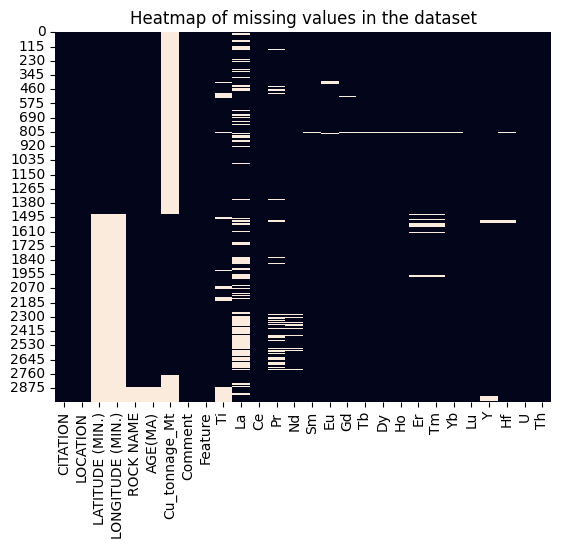

In [465]:
plt.title("Heatmap of missing values in the dataset")
sns.heatmap(df1.isnull(), cbar=False)

### Renaming the columns for ease of working

In [466]:
df1.rename(columns = {'LOCATION': 'location', 
                      'LATITUDE (MIN.)':'latitude', 
                      'LONGITUDE (MIN.)':'longitude', 
                      'ROCK NAME':'rock_name', 
                      'AGE(MA)':'age_ma'}, inplace=True)

In [467]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [468]:
### Checking the latitude column for null values

In [469]:
#null_lat_rec = sqldf("""
 #                       SELECT location, COUNT(*)
  #                      FROM df1
   ###
      #               """)

In [470]:
import pandas as pd

# Assuming df1 is your DataFrame
# You may need to replace 'df1' with the actual name of your DataFrame
null_lat_rec = df1[df1['latitude'].isnull()].groupby('location').size().reset_index(name='count')


In [471]:
null_lat_rec

,location,count
0,Aktogai,8
1,Baogutu,6
2,Batu Hijau,63
3,Bishop,19
4,Borly,5
5,Bozshakol,17
6,Chuquicamata,30
7,Chuquicamata-Rad,123
8,Dexing,48
9,El Abra,9


In [472]:
null_lat_rec

,location,count
0,Aktogai,8
1,Baogutu,6
2,Batu Hijau,63
3,Bishop,19
4,Borly,5
5,Bozshakol,17
6,Chuquicamata,30
7,Chuquicamata-Rad,123
8,Dexing,48
9,El Abra,9


### Data Collection for missing latitude and longitude

In [473]:
coordinates_map = {
    'Aktogai':[46, 80],
    'Baogutu':[45, 84],
    'Batu Hijau':[-9, 117],
    'Bishop':[37, -118],
    'Borly':[48, -76],
    'Bozshakol':[51, 72],
    'Chuquicamata':[-22, -67],
    'Chuquicamata-Rad':[-22, -67],
    'Dexing':[28, 117],
    'El Abra':[-22, -68],
    'El Salvador':[-26, -70],
    'El Teniente':[-34, -70],
    'Erdenet':[49, 104],
    'Heruga':[43, 106],
    'Hugo Dummett':[43, 106],
    'Jiama':[35, 105],
    'Koksai':[44, 78],
    'Kounrad':[47, 75],
    'NChuquicamata-Rad':[-22, -67],
    'Nurkazghan':[50, 73],
    'Opache':[-22, -67],
    'Oyu Tolgoi':[43, 106],
    'Qulong':[30, 92],
    'Radomiro Tomic':[-22, -67],
    'Red Chris':[58, -130],
    'Sar Cheshmeh':[30, 56],
    'Shujiadian':[33, 110],
    'Sungun':[38, 46],
    'Tampakan':[6, 125],
    'Tintaya':[-15, -71],
    'Tuwu-Yandong':[42, 93],
    'Yellowstone':[45, 111],
    'Younger Toba Tuff':[3, 99],
    'Yulong':[31, 98]
}

In [474]:
### Functions to fill missing latitude and longitude values

In [475]:
def set_latitude(location):
    return coordinates_map[location][0]

def set_longitude(location):
    return coordinates_map[location][1]

In [476]:
df1['location'] = df1['location'].apply(str.strip)

In [477]:
null_latitude_rec = df1[df1['latitude'].isnull()]
null_latitude_rec

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1466,Shen et al. 2015,Borly,NaN,NaN,Gr-1,316.0,0.6,Fertility,1,8.64,...,86.5,32.1,NaN,NaN,409.0,83.0,1049.0,9740.0,494.0,342.0
1467,Shen et al. 2015,Borly,NaN,NaN,Gr-2,316.0,0.6,Fertility,1,9.92,...,119.0,43.7,NaN,NaN,527.0,102.0,1408.0,9690.0,625.0,495.0
1468,Shen et al. 2015,Borly,NaN,NaN,Gr-6,316.0,0.6,Fertility,1,10.90,...,83.3,32.6,NaN,NaN,421.0,86.0,1061.0,9320.0,509.0,338.0
1469,Shen et al. 2015,Borly,NaN,NaN,Gr-9,316.0,0.6,Fertility,1,5.60,...,104.0,37.8,NaN,NaN,444.0,86.0,1292.0,9010.0,321.0,319.0
1470,Shen et al. 2015,Borly,NaN,NaN,Gr-10,316.0,0.6,Fertility,1,16.20,...,49.9,18.8,NaN,NaN,203.0,37.0,613.0,9550.0,181.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


### Invoking the functions to replace missing latitudes and longitudes

In [478]:
null_latitude_rec['latitude'] = null_latitude_rec['latitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_latitude))

null_latitude_rec['longitude'] = null_latitude_rec['longitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_longitude))

In [479]:
null_latitude_rec

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1466,Shen et al. 2015,Borly,48.0,-76.0,Gr-1,316.0,0.6,Fertility,1,8.64,...,86.5,32.1,NaN,NaN,409.0,83.0,1049.0,9740.0,494.0,342.0
1467,Shen et al. 2015,Borly,48.0,-76.0,Gr-2,316.0,0.6,Fertility,1,9.92,...,119.0,43.7,NaN,NaN,527.0,102.0,1408.0,9690.0,625.0,495.0
1468,Shen et al. 2015,Borly,48.0,-76.0,Gr-6,316.0,0.6,Fertility,1,10.90,...,83.3,32.6,NaN,NaN,421.0,86.0,1061.0,9320.0,509.0,338.0
1469,Shen et al. 2015,Borly,48.0,-76.0,Gr-9,316.0,0.6,Fertility,1,5.60,...,104.0,37.8,NaN,NaN,444.0,86.0,1292.0,9010.0,321.0,319.0
1470,Shen et al. 2015,Borly,48.0,-76.0,Gr-10,316.0,0.6,Fertility,1,16.20,...,49.9,18.8,NaN,NaN,203.0,37.0,613.0,9550.0,181.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


In [480]:
df1.loc[null_latitude_rec.index, 'latitude'] = null_latitude_rec['latitude']
df1.loc[null_latitude_rec.index, 'longitude'] = null_latitude_rec['longitude']

In [481]:
print('Latitude nulls: ', df1['latitude'].isna().sum())
print('Longitude nulls: ', df1['longitude'].isna().sum())

Latitude nulls:  0
Longitude nulls:  0


### Replace "Cu_Tonnage" for Barren ores with 0.0

In [482]:
df1.loc[df1['Comment'] == 'Barren', 'Cu_tonnage_Mt'] = 0.0

### Just the trace elements left for handling nulls

In [483]:
df1.isnull().sum().sort_values(ascending=False)

La               923
Pr               256
Ti               255
rock_name        124
age_ma           124
Nd                93
Er                79
Tm                78
Y                 74
Hf                25
Eu                15
Sm                 8
Gd                 6
Ce                 5
Dy                 3
Lu                 2
Yb                 1
Tb                 1
Ho                 1
U                  0
CITATION           0
location           0
Feature            0
Comment            0
Cu_tonnage_Mt      0
longitude          0
latitude           0
Th                 0
dtype: int64

In [484]:
import pandas as pd

# Assuming df1 is your DataFrame
# df1 = ...

result = df1.groupby('Comment').agg({
    'La': 'mean',
    'Pr': 'mean',
    'Ti': 'mean',
    'age_ma': 'mean',
    'Nd': 'mean',
    'Er': 'mean',
    'Tm': 'mean',
    'Y': 'mean',
    'Hf': 'mean',
    'Eu': 'mean',
    'Sm': 'mean',
    'Gd': 'mean',
    'Ce': 'mean',
    'Dy': 'mean',
    'Lu': 'mean',
    'Yb': 'mean',
    'Tb': 'mean',
    'Ho': 'mean'
}).reset_index()

print(result)


     Comment        La        Pr         Ti      age_ma         Nd  \
0     Barren  5.496975  2.803270  38.320030  556.602423  12.349263   
1  Fertility  0.234889  0.123007   6.714327  201.778094   1.367614   

           Er         Tm            Y            Hf        Eu         Sm  \
0  320.348590  72.562911  2154.694014  11113.827390  1.481066  11.697207   
1  125.670413  30.266185   769.383452   8854.285237  1.016840   2.535607   

          Gd         Ce          Dy          Lu          Yb         Tb  \
0  47.258081  35.642595  213.756964  121.309176  649.943063  18.653674   
1  15.371648  21.207080   54.388516   66.430931  325.240032   6.329784   

          Ho  
0  74.816806  
1  29.417486  


In [485]:
result

,Comment,La,Pr,Ti,age_ma,Nd,Er,Tm,Y,Hf,Eu,Sm,Gd,Ce,Dy,Lu,Yb,Tb,Ho
0,Barren,5.496975,2.803270,38.320030,556.602423,12.349263,320.348590,72.562911,2154.694014,11113.827390,1.481066,11.697207,47.258081,35.642595,213.756964,121.309176,649.943063,18.653674,74.816806
1,Fertility,0.234889,0.123007,6.714327,201.778094,1.367614,125.670413,30.266185,769.383452,8854.285237,1.016840,2.535607,15.371648,21.207080,54.388516,66.430931,325.240032,6.329784,29.417486


### Mean Values of trace elements based on type of ore: Barren or Fertility

In [486]:
#sqldf("""
 #           
  #        SELECT Comment, AVG(La), AVG(Pr), AVG(Ti), AVG(age_ma), AVG(Nd), AVG(Er), AVG(Tm), AVG(Y), AVG(Hf),
   #                       AVG(Eu), AVG(Sm), AVG(Gd), AVG(Ce), AVG(Dy), AVG(Lu), AVG(Yb), AVG(Tb), AVG(Ho)
    #      FROM df1
     #     GROUP BY Comment
      #  
      #""")

In [487]:
### Missing "rock_name" records belong to BARREN type.

In [488]:
#sqldf("""
 #           
  #          SELECT Comment, COUNT(*) AS count
   #         FROM df1
    #        WHERE rock_name IS NULL
     #       GROUP BY Comment

      #""")

In [489]:
df1.loc[df1['Comment'] == 'Barren'].head(2)

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,7.88,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,10.90,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0


In [490]:
import pandas as pd

# Assuming df1 is your DataFrame
result1 = df1[df1['rock_name'].isnull()].groupby('Comment').size().reset_index(name='count')
print(result1)


  Comment  count
0  Barren    124


In [491]:
# Notice that a few of the Barren ores contain rock_name. A good approach is to fill the missing values with mode.
# In Addition, there is a category by the name "NOT GIVEN". We can even choose to replace nulls with it.

In [492]:
df1.loc[df1['Comment'] == 'Barren']['rock_name'].value_counts()

rock_name
GRANITE              524
NOT GIVEN            214
GRANITE, RAPAKIVI    168
ANDESITE             107
GNEISS                88
                    ... 
RC13-78_56             1
RC13-78_34             1
RC13-78_33             1
RC13-78_31             1
TTZ1-58                1
Name: count, Length: 115, dtype: int64

In [493]:
### All missing rock_name records belong to one location: "Chuquicamata-Rad"

In [494]:
df1.loc[df1['rock_name'].isnull()][['Comment', 'rock_name', 'age_ma', 'location']]

,Comment,rock_name,age_ma,location
2864,Barren,NaN,NaN,NChuquicamata-Rad
2865,Barren,NaN,NaN,Chuquicamata-Rad
2866,Barren,NaN,NaN,Chuquicamata-Rad
2867,Barren,NaN,NaN,Chuquicamata-Rad
2868,Barren,NaN,NaN,Chuquicamata-Rad
...,...,...,...,...
2983,Barren,NaN,NaN,Chuquicamata-Rad
2984,Barren,NaN,NaN,Chuquicamata-Rad
2985,Barren,NaN,NaN,Chuquicamata-Rad
2986,Barren,NaN,NaN,Chuquicamata-Rad


In [495]:
#sqldf("""
 #           SELECT location, age_ma, Comment, rock_name, latitude, longitude
  ###        
     #""")

In [496]:
import pandas as pd

# Assuming df1 is your DataFrame containing the data
# Replace df1 with the name of your DataFrame if different

# SQL query equivalent in pandas
result1 = df1.loc[df1['location'] == 'Chuquicamata', ['location', 'age_ma', 'Comment', 'rock_name', 'latitude', 'longitude']]

# Displaying the result
result1


,location,age_ma,Comment,rock_name,latitude,longitude
2139,Chuquicamata,35.0,Fertility,610-01,-22.0,-67.0
2140,Chuquicamata,35.0,Fertility,610-02,-22.0,-67.0
2141,Chuquicamata,35.0,Fertility,610-03,-22.0,-67.0
2142,Chuquicamata,35.0,Fertility,610-04,-22.0,-67.0
2143,Chuquicamata,35.0,Fertility,610-05,-22.0,-67.0
2144,Chuquicamata,35.0,Fertility,610-06,-22.0,-67.0
2145,Chuquicamata,35.0,Fertility,610-07,-22.0,-67.0
2146,Chuquicamata,35.0,Fertility,610-08,-22.0,-67.0
2147,Chuquicamata,35.0,Fertility,610-09,-22.0,-67.0
2148,Chuquicamata,35.0,Fertility,610-10,-22.0,-67.0


In [497]:
df1.loc[df1['location'] == 'NChuquicamata-Rad', 'location'] = 'Chuquicamata-Rad'

In [498]:
df1['location'].value_counts()

location
Hugo Dummett                                                                                                          252
Heruga                                                                                                                208
BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PROVINCE / FINLAND / WIBORG RAPAKIVI GRANITE BATHOLITH                     168
CENTRAL ASIAN FOLDBELT - CENOZOIC/QUATERNARY / CHINA - CENOZOIC/QUATERNARY / TIBET                                    150
CENTRAL ASIAN FOLDBELT - PALEOZOIC / CHINA - PALEOZOIC / GUANGXI PROVINCE / DARONGSHAN BATHOLITH - JIUZHOU COMPLEX    144
                                                                                                                     ... 
Aktogai                                                                                                                 8
Erdenet                                                                                                                 8
Baogutu        

In [499]:
### Age_ma missing values

In [500]:
#null_age = sqldf("""
 #                     SELECT location, Comment  
    #                  FROM df1
     #                 WHERE age_ma IS NULL
      #            """)

In [501]:
import pandas as pd

# Assuming df1 is your DataFrame
null_age = df1[df1['age_ma'].isnull()][['location', 'Comment']]


In [502]:
null_age['Comment'].value_counts()

Comment
Barren    124
Name: count, dtype: int64

In [503]:
null_age

,location,Comment
2864,Chuquicamata-Rad,Barren
2865,Chuquicamata-Rad,Barren
2866,Chuquicamata-Rad,Barren
2867,Chuquicamata-Rad,Barren
2868,Chuquicamata-Rad,Barren
...,...,...
2983,Chuquicamata-Rad,Barren
2984,Chuquicamata-Rad,Barren
2985,Chuquicamata-Rad,Barren
2986,Chuquicamata-Rad,Barren


In [504]:
null_age.index = range(len(null_age))
null_age

,location,Comment
0,Chuquicamata-Rad,Barren
1,Chuquicamata-Rad,Barren
2,Chuquicamata-Rad,Barren
3,Chuquicamata-Rad,Barren
4,Chuquicamata-Rad,Barren
...,...,...
119,Chuquicamata-Rad,Barren
120,Chuquicamata-Rad,Barren
121,Chuquicamata-Rad,Barren
122,Chuquicamata-Rad,Barren


In [505]:
null_age['location'].value_counts()

location
Chuquicamata-Rad    124
Name: count, dtype: int64

In [506]:
df1['age_ma'].sample(20)

1580      16.000000
149      235.000000
1359     119.000000
1754      41.000000
2966            NaN
2589     370.000000
2507     370.000000
2520     370.000000
1896       3.800000
1348     124.000000
2651     370.000000
1910       3.800000
2141      35.000000
2676     370.000000
542       56.900000
927     1620.759664
746      252.000000
654      245.000000
2072      19.930000
2701     370.000000
Name: age_ma, dtype: float64

### Plotting the Distributions

<Axes: xlabel='age_ma', ylabel='Density'>

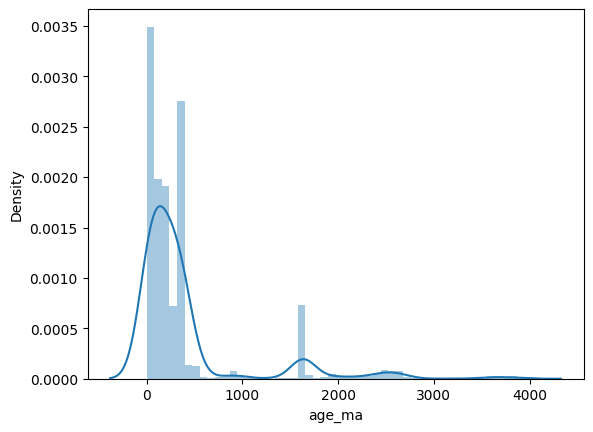

In [507]:
import seaborn as sns
sns.distplot(df1['age_ma'])

In [508]:
df1

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,7.88,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,10.90,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,6.00,...,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,9.06,...,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,4.93,...,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,0.0,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,0.0,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,0.0,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,0.0,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


In [509]:
#barren_age = sqldf("""
 #                 SELECT age_ma, LOCATION  
  #                FROM df1
    #              WHERE Comment = 'Barren'
#
 #                 """)

In [510]:
import pandas as pd

# Assuming df1 is your pandas DataFrame
barren_age = df1.loc[df1['Comment'] == 'Barren', ['age_ma', 'location']]


In [511]:
barren_age

,age_ma,location
0,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
1,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
2,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
3,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
4,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
...,...,...
2983,NaN,Chuquicamata-Rad
2984,NaN,Chuquicamata-Rad
2985,NaN,Chuquicamata-Rad
2986,NaN,Chuquicamata-Rad


<Axes: xlabel='age_ma', ylabel='Density'>

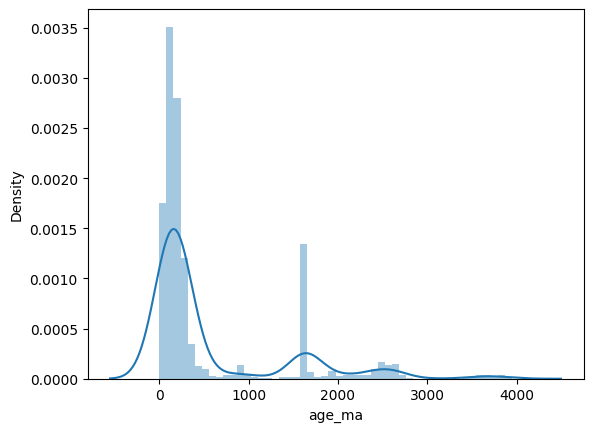

In [512]:
sns.distplot(barren_age['age_ma'])

In [513]:
print(barren_age['age_ma'].mean())

556.6024229734869


In [514]:
print(barren_age['age_ma'].median())

222.0


In [515]:
#fertile_age = sqldf("""
 #                     SELECT age_ma, LOCATION  
  #                    FROM df1
   #                   WHERE Comment = 'Fertility'
    #              """)

In [516]:
import pandas as pd

# Assuming df1 is your DataFrame
# First, filter the DataFrame to include only rows where Comment is 'Fertility'
fertile_age = df1[df1['Comment'] == 'Fertility']

# Then, select the 'age_ma' and 'LOCATION' columns
fertile_age = fertile_age[['age_ma', 'location']]


<Axes: xlabel='age_ma', ylabel='Density'>

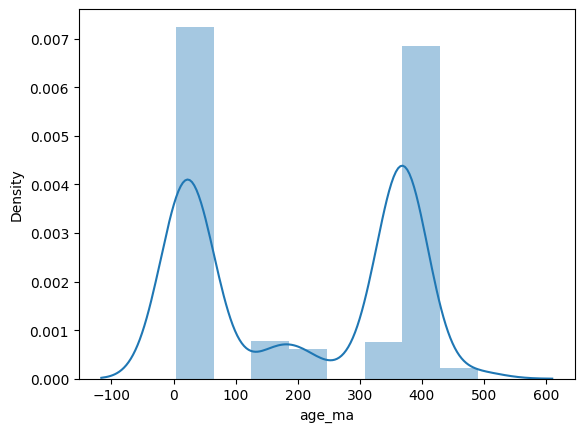

In [517]:
sns.distplot(fertile_age['age_ma'])

<Axes: xlabel='Hf', ylabel='Density'>

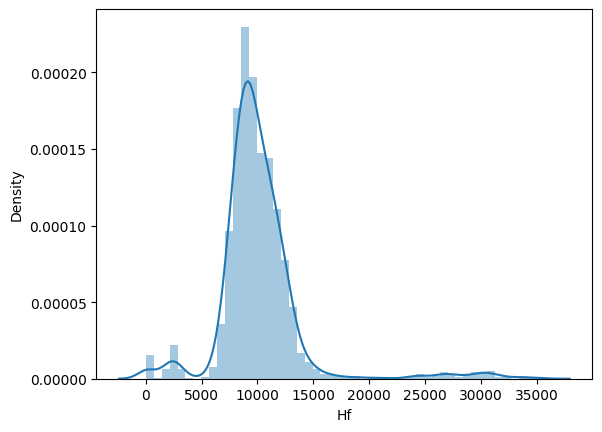

In [518]:
sns.distplot(df1['Hf'])

<Axes: >

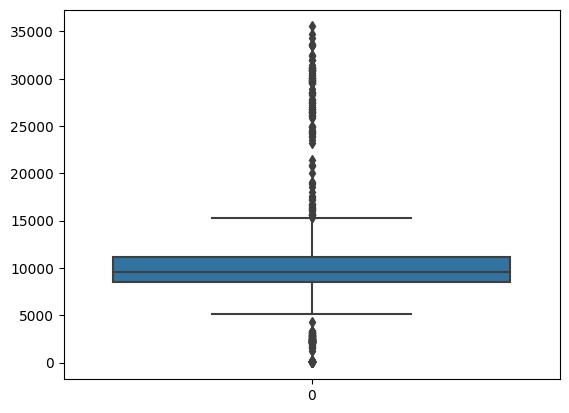

In [519]:
sns.boxplot(df1['Hf'])

In [520]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [521]:
df1.drop(columns=['CITATION', 'rock_name'], inplace=True)

In [522]:
df1.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [523]:
df1.isnull().sum().sort_values(ascending=False)

La               923
Pr               256
Ti               255
age_ma           124
Nd                93
Er                79
Tm                78
Y                 74
Hf                25
Eu                15
Sm                 8
Gd                 6
Ce                 5
Dy                 3
Lu                 2
Yb                 1
Tb                 1
Ho                 1
U                  0
location           0
latitude           0
Feature            0
Comment            0
Cu_tonnage_Mt      0
longitude          0
Th                 0
dtype: int64

In [524]:
def replace_nulls(df, features):
    for feature in features:
        barren_median = df1[df1['Comment'] == 'Barren'][feature].median()
        fertile_median = df1[df1['Comment'] == 'Fertility'][feature].median()

        print(feature, barren_median, fertile_median)
        
        print(df[feature])
        df[feature] = df[feature].fillna(df.apply(lambda row: barren_median 
                                                  if row['Comment'] == 'Barren' else fertile_median, axis=1))
                                     
    return df

In [525]:
features = ['Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
            'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

In [526]:
df1_copy = df1.copy()

In [527]:
df1_copy[['Ti', 'La', 'Ce', 'Pr']]

,Ti,La,Ce,Pr
0,7.88,0.050,10.5,0.050
1,10.90,69.100,169.0,22.500
2,6.00,0.020,25.1,0.300
3,9.06,0.280,12.0,NaN
4,4.93,0.070,16.5,0.150
...,...,...,...,...
2983,NaN,0.007,8.0,0.051
2984,NaN,0.013,9.0,0.137
2985,NaN,0.015,9.0,0.172
2986,NaN,0.002,8.0,0.039


In [528]:
df1_copy = replace_nulls(df1_copy, features)

Ti 9.728431202 5.55
0        7.88
1       10.90
2        6.00
3        9.06
4        4.93
        ...  
2983      NaN
2984      NaN
2985      NaN
2986      NaN
2987      NaN
Name: Ti, Length: 2988, dtype: float64
La 0.190204577 0.0395872595
0        0.050
1       69.100
2        0.020
3        0.280
4        0.070
         ...  
2983     0.007
2984     0.013
2985     0.015
2986     0.002
2987     0.056
Name: La, Length: 2988, dtype: float64
Ce 16.472930945 13.01863289
0        10.5
1       169.0
2        25.1
3        12.0
4        16.5
        ...  
2983      8.0
2984      9.0
2985      9.0
2986      8.0
2987      8.0
Name: Ce, Length: 2988, dtype: float64
Pr 0.20350000000000001 0.0652387115
0        0.050
1       22.500
2        0.300
3          NaN
4        0.150
         ...  
2983     0.051
2984     0.137
2985     0.172
2986     0.039
2987     0.075
Name: Pr, Length: 2988, dtype: float64
Nd 2.56 0.7761290240000001
0         4.25
1       132.00
2         4.41
3         1.88
4      

In [529]:
df1_copy[['Ti', 'La', 'Ce', 'Pr']]

,Ti,La,Ce,Pr
0,7.880000,0.050,10.5,0.0500
1,10.900000,69.100,169.0,22.5000
2,6.000000,0.020,25.1,0.3000
3,9.060000,0.280,12.0,0.2035
4,4.930000,0.070,16.5,0.1500
...,...,...,...,...
2983,9.728431,0.007,8.0,0.0510
2984,9.728431,0.013,9.0,0.1370
2985,9.728431,0.015,9.0,0.1720
2986,9.728431,0.002,8.0,0.0390


In [530]:
df1_copy.isnull().sum()

location           0
latitude           0
longitude          0
age_ma           124
Cu_tonnage_Mt      0
Comment            0
Feature            0
Ti                 0
La                 0
Ce                 0
Pr                 0
Nd                 0
Sm                 0
Eu                 0
Gd                 0
Tb                 0
Dy                 0
Ho                 0
Er                 0
Tm                 0
Yb                 0
Lu                 0
Y                  0
Hf                 0
U                  0
Th                 0
dtype: int64

In [531]:
df1_copy.loc[df1_copy['age_ma'].isnull()]

,location,latitude,longitude,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,La,Ce,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
2864,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.068,15.0,...,153.4,53.7,228.6,46.0,408.0,70.1,1609.0,8515.0,453.0,494.0
2865,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.074,15.0,...,164.7,57.2,247.0,50.1,445.0,76.5,1735.0,8836.0,445.0,493.0
2866,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.036,21.0,...,153.4,52.1,222.6,46.2,412.0,69.7,1563.0,10070.0,544.0,533.0
2867,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.062,20.0,...,153.9,51.9,222.0,45.8,412.0,69.1,1545.0,9855.0,506.0,498.0
2868,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.003,15.0,...,92.0,32.7,142.6,30.9,286.0,49.5,988.0,10232.0,312.0,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.007,8.0,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.013,9.0,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.015,9.0,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.002,8.0,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


In [532]:
df1_copy.loc[df1_copy['location'] == 'Chuquicamata-Rad', 'age_ma'] = 35.0

In [533]:
df1_copy.isna().sum()

location         0
latitude         0
longitude        0
age_ma           0
Cu_tonnage_Mt    0
Comment          0
Feature          0
Ti               0
La               0
Ce               0
Pr               0
Nd               0
Sm               0
Eu               0
Gd               0
Tb               0
Dy               0
Ho               0
Er               0
Tm               0
Yb               0
Lu               0
Y                0
Hf               0
U                0
Th               0
dtype: int64

In [534]:

df1.drop(columns=['location', 'latitude', 'longitude'], inplace=True)

In [535]:
df1_copy['Feature'].value_counts()

Feature
0    1687
1    1301
Name: count, dtype: int64

In [536]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [537]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [538]:
X = df1_copy.drop(columns = ['Comment', 'Feature', 'location', 'latitude', 'longitude'])   
y = df1_copy['Feature']

In [539]:
X.head()

,age_ma,Cu_tonnage_Mt,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,0.0,7.88,0.05,10.5,0.0500,4.25,11.60,1.99,61.6,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,222.0,0.0,10.90,69.10,169.0,22.5000,132.00,41.80,4.34,102.0,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,222.0,0.0,6.00,0.02,25.1,0.3000,4.41,13.80,2.30,79.9,...,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,222.0,0.0,9.06,0.28,12.0,0.2035,1.88,5.08,1.01,33.8,...,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,222.0,0.0,4.93,0.07,16.5,0.1500,2.32,8.23,1.52,45.6,...,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [540]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Feature, dtype: int64

In [541]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [542]:
type(X_train)

pandas.core.frame.DataFrame

In [543]:
y_train.shape

(2390,)

In [544]:
y_train.sum()

1031

### Perform scaling

In [545]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Logistic Regression Model

In [546]:
lr_model = LogisticRegression()

In [547]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [548]:
y_pred = lr_model.predict(X_test_scaled)

In [549]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [550]:
accuracy_score(y_test, y_pred)

0.9715719063545151

In [551]:
cm = confusion_matrix(y_test, y_pred)

In [552]:
cm

array([[328,   0],
       [ 17, 253]])

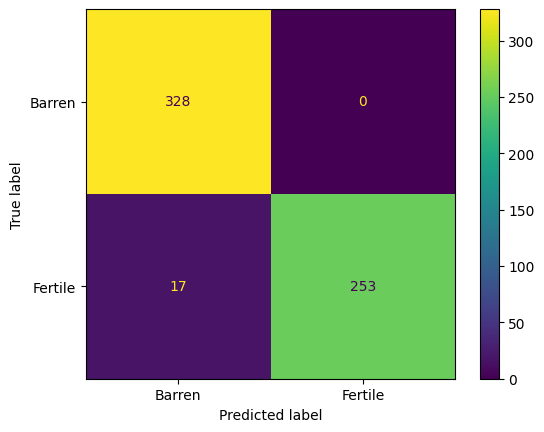

In [553]:
ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

### Handling Outliers

In [554]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [555]:
features_with_outliers = ['age_ma', 'Cu_tonnage_Mt',
                           'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
                           'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

### Box-plot before handling outliers

age_ma float64


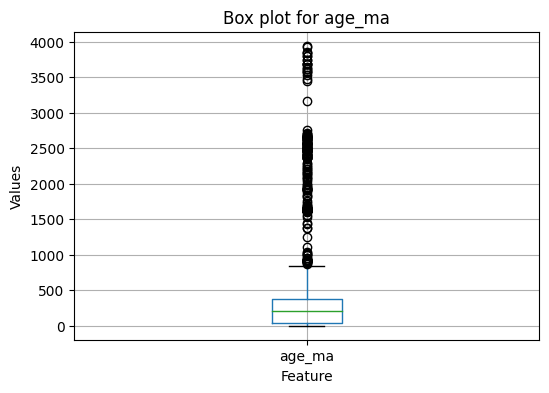

Cu_tonnage_Mt float64


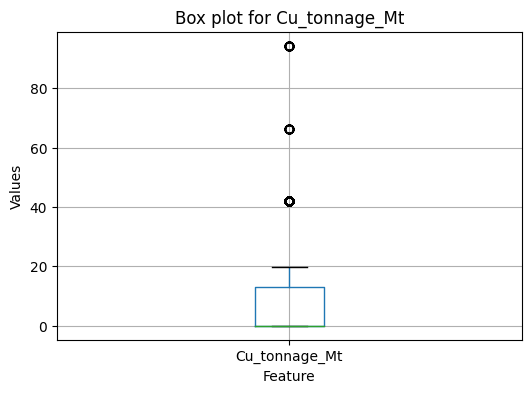

Ti float64


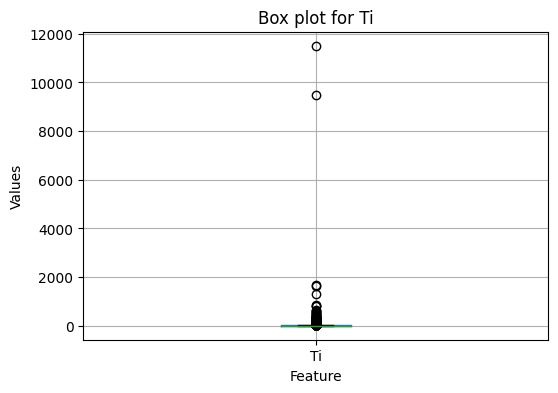

La float64


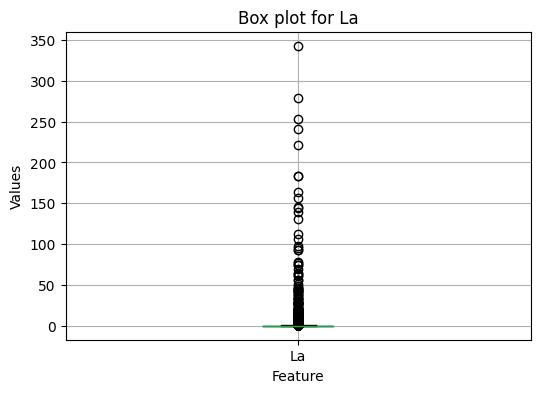

Ce float64


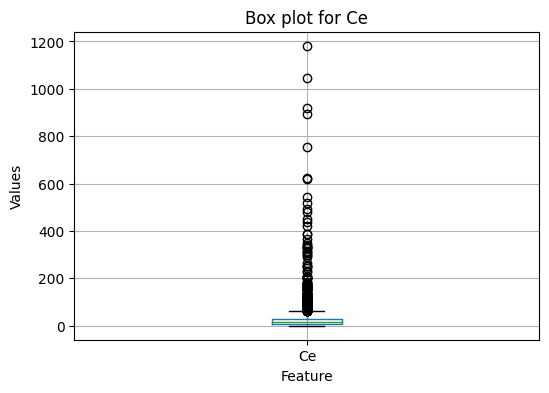

Pr float64


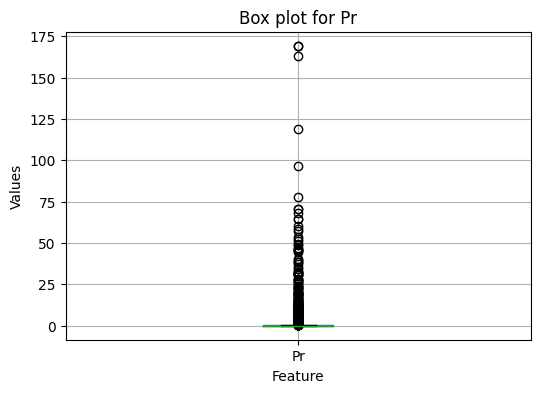

Nd float64


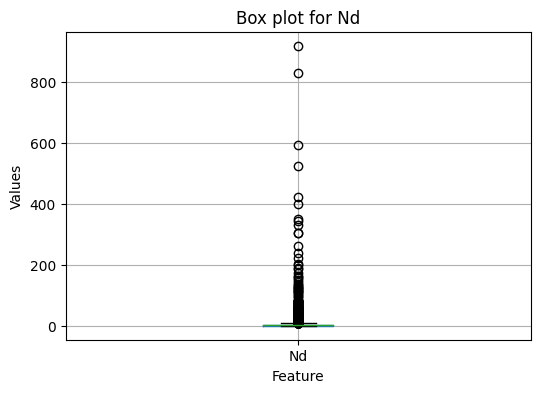

Sm float64


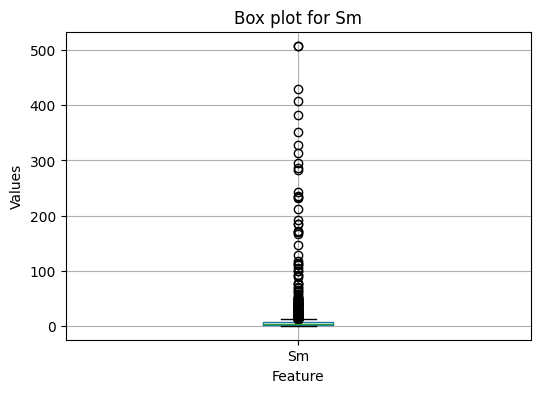

Eu float64


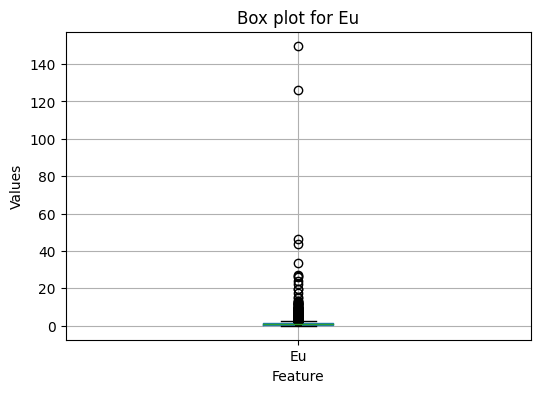

Gd float64


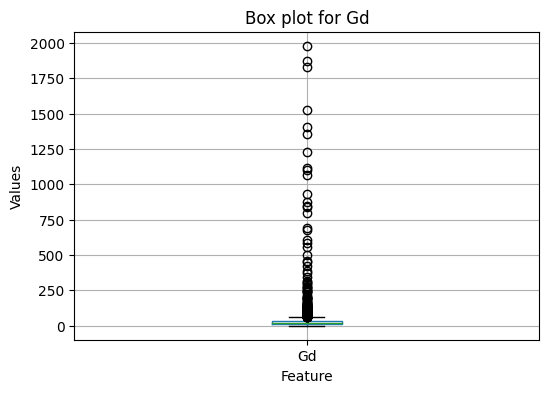

Tb float64


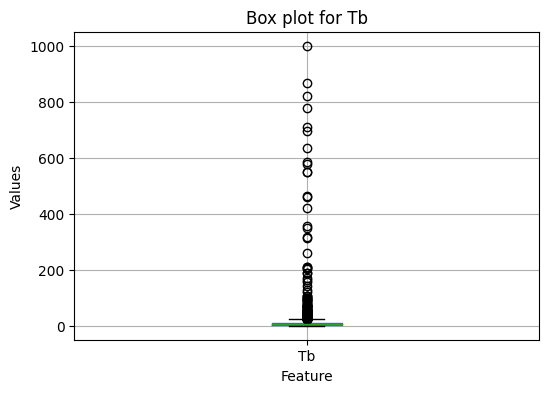

Dy float64


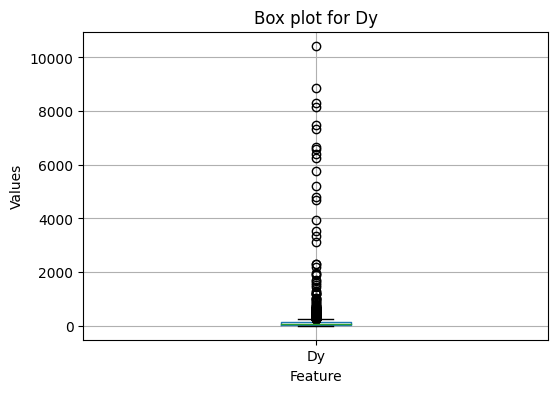

Ho float64


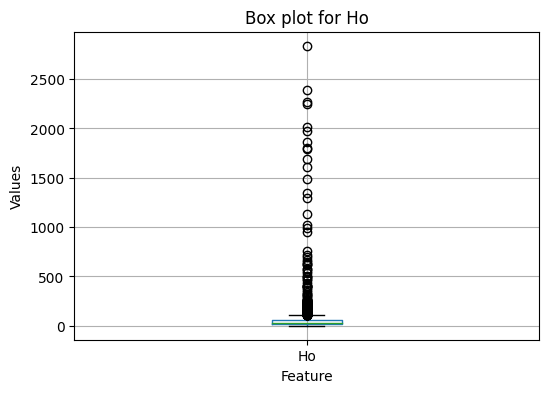

Er float64


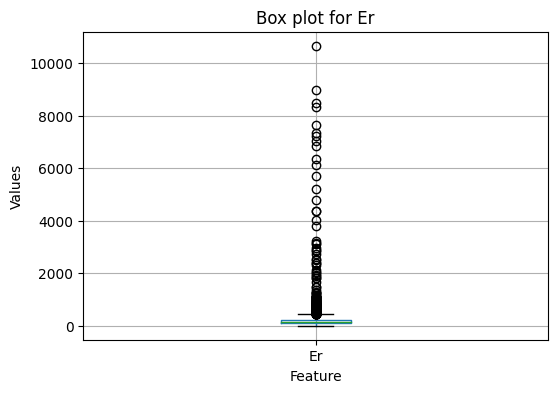

Tm float64


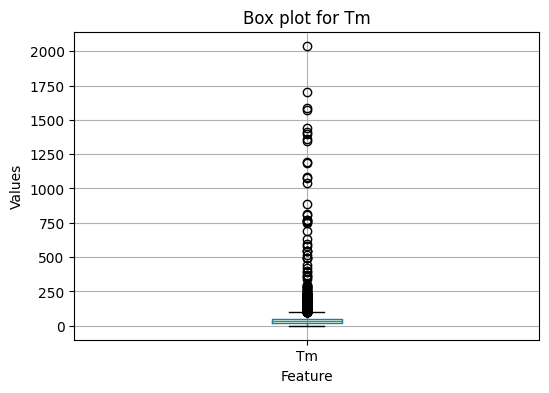

Yb float64


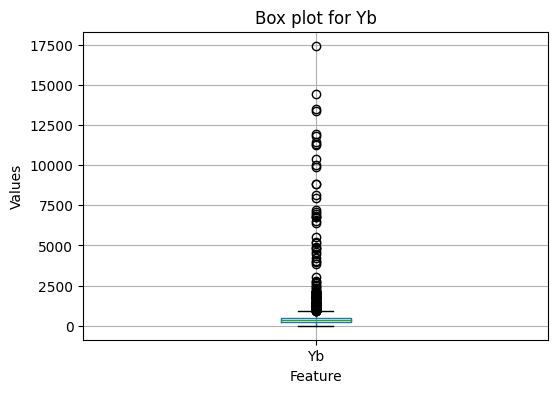

Lu float64


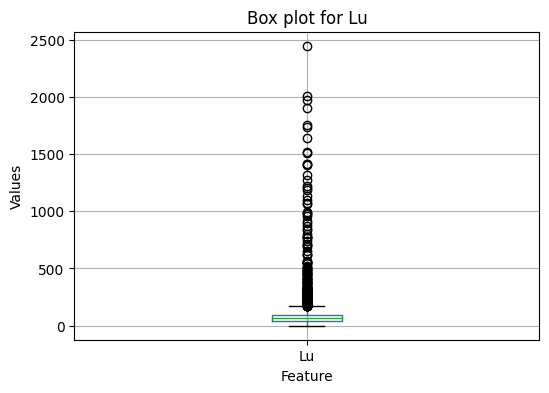

Y float64


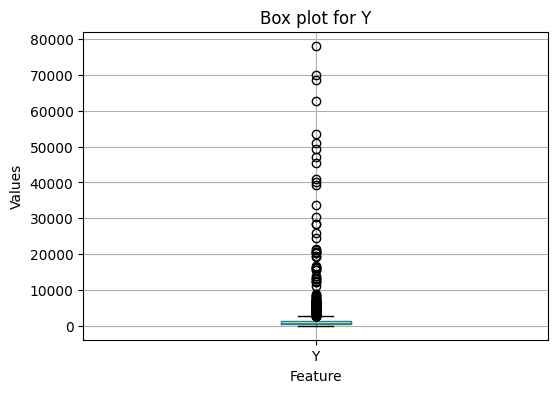

Hf float64


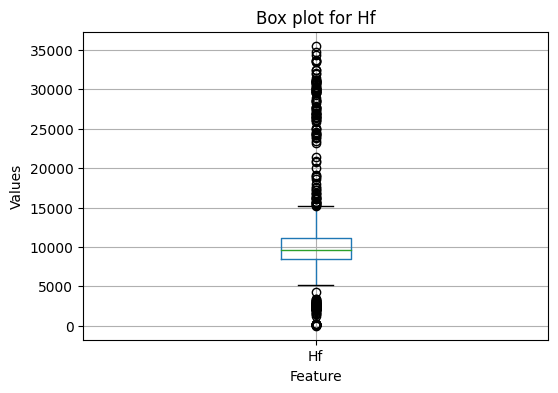

U float64


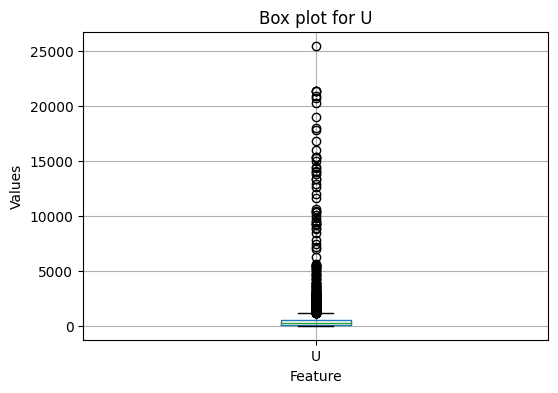

Th float64


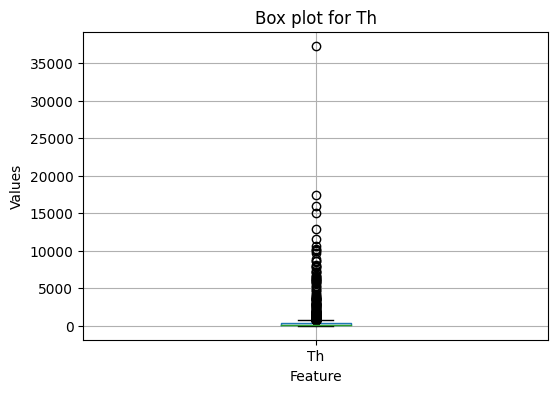

In [556]:
for feature in features_with_outliers:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

In [557]:
import pandas as pd

def replace_outliers(df):
    # Loop through each column
    for feature in features_with_outliers:
        # Check if the column contains numeric data (integer or float)
        if df[feature].dtype in ['int64', 'float64']:
            # Calculate the first and third quartiles
            q1 = df[feature].quantile(0.25)
            q3 = df[feature].quantile(0.75)
            
            # Calculate the interquartile range (IQR)
            iqr = q3 - q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # Replace outliers with the maximum and minimum values of the column
            df[feature] = df[feature].apply(lambda x: max(x, lower_bound) if x < lower_bound 
                                            else min(x, upper_bound) if x > upper_bound 
                                            else x)
    
    return df

In [558]:
df1_copy = replace_outliers(df1_copy)

In [559]:
df1_copy.drop(columns=['location', 'latitude', 'longitude'], inplace=True)

### Box-plots after handling outliers

age_ma float64


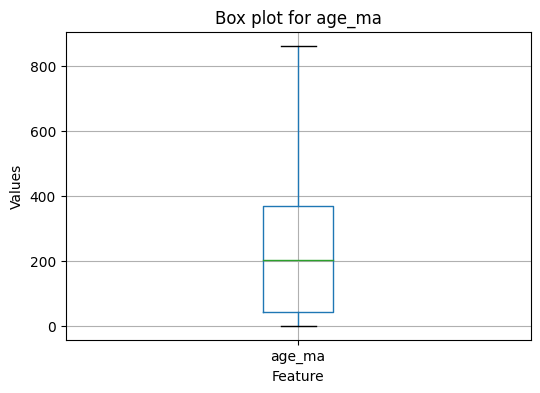

Cu_tonnage_Mt float64


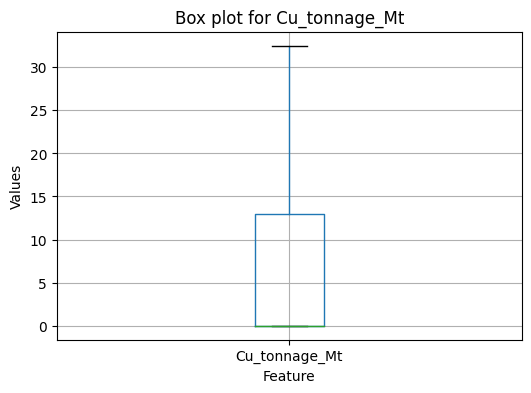

Ti float64


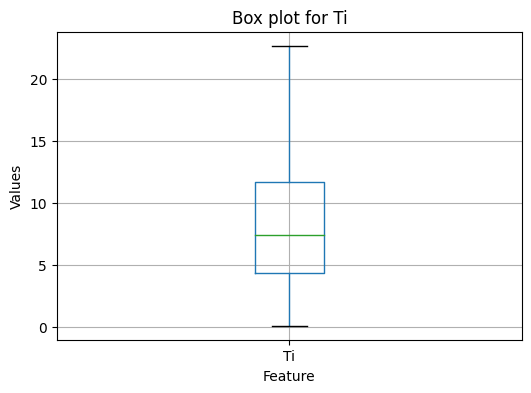

La float64


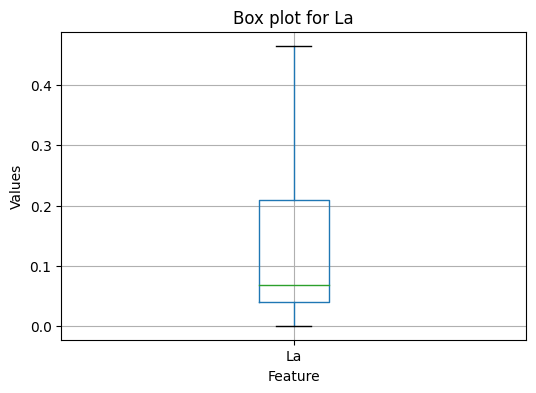

Ce float64


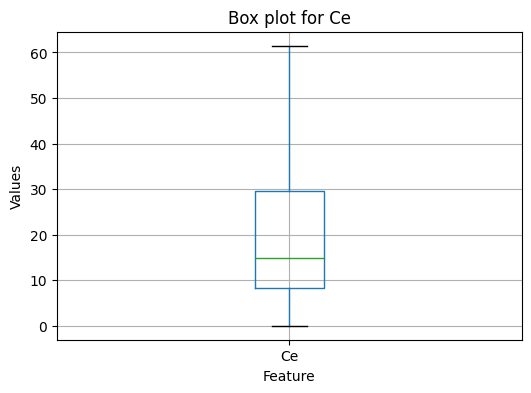

Pr float64


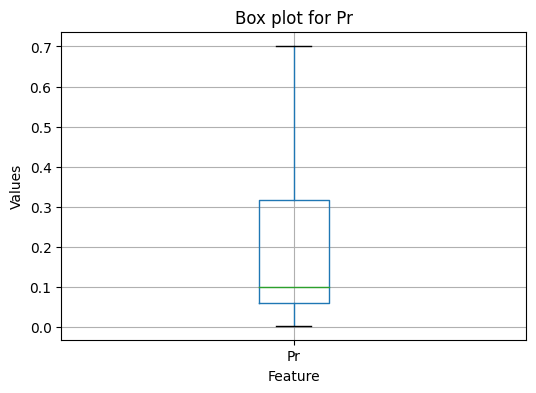

Nd float64


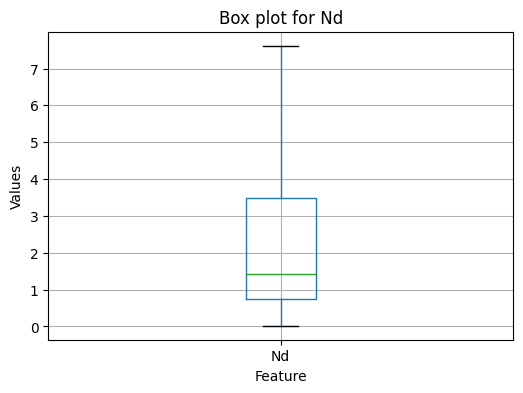

Sm float64


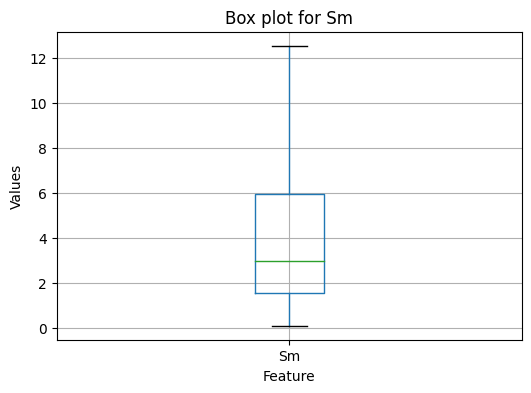

Eu float64


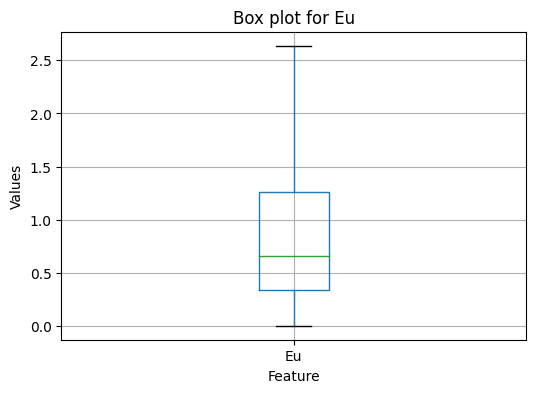

Gd float64


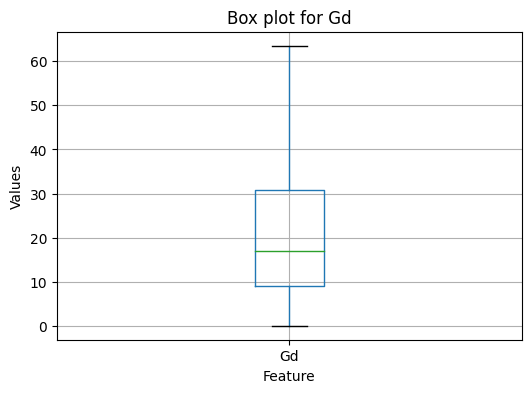

Tb float64


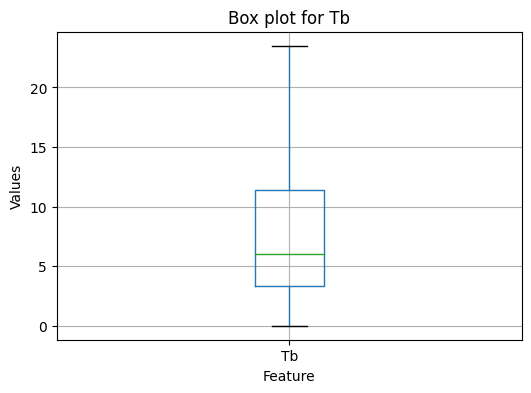

Dy float64


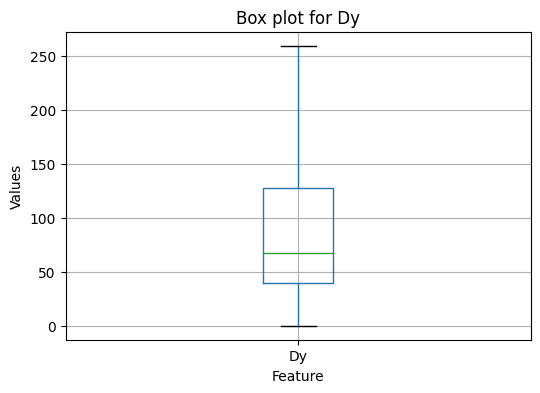

Ho float64


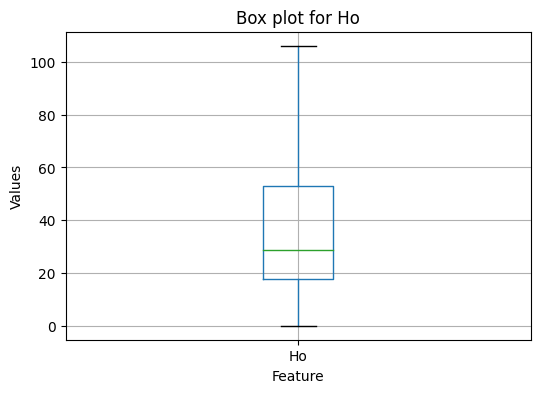

Er float64


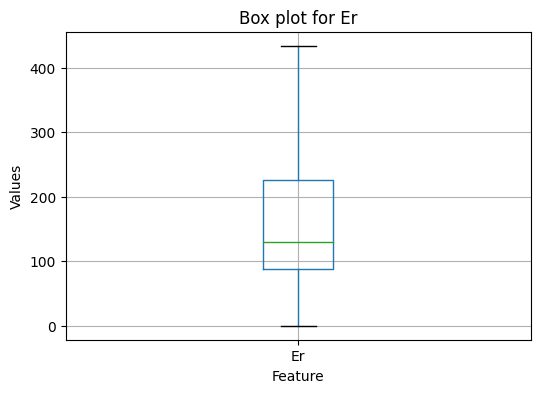

Tm float64


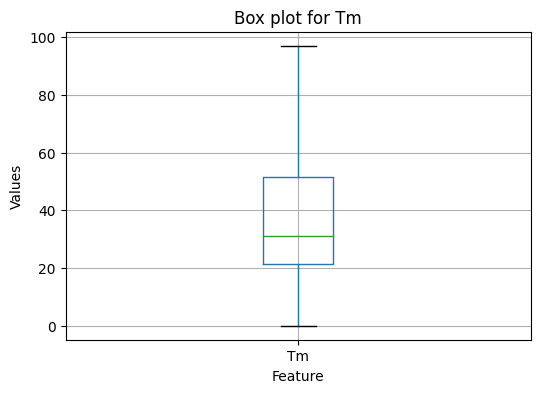

Yb float64


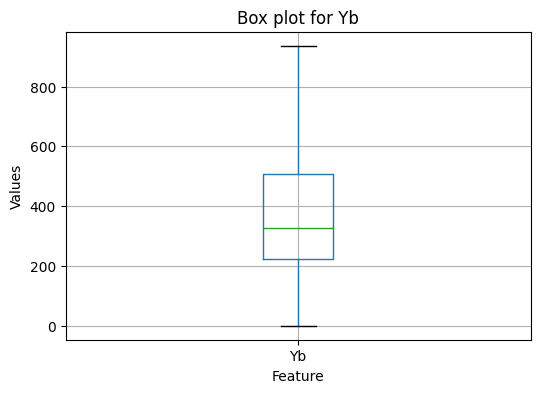

Lu float64


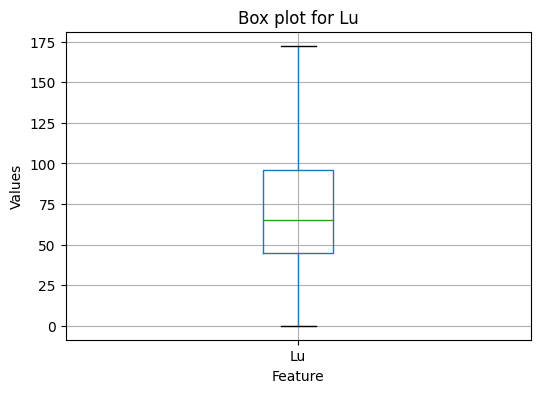

Y float64


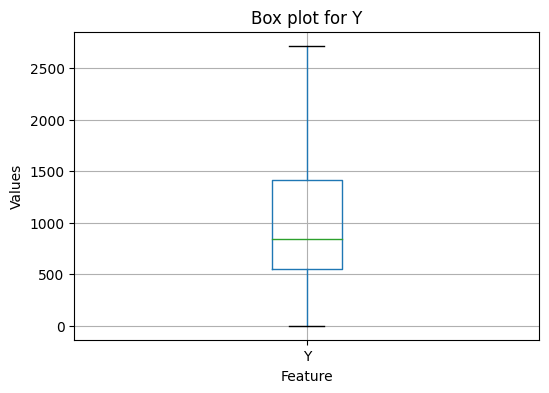

Hf float64


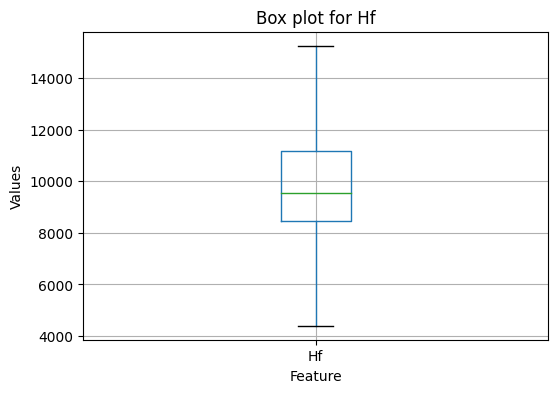

U float64


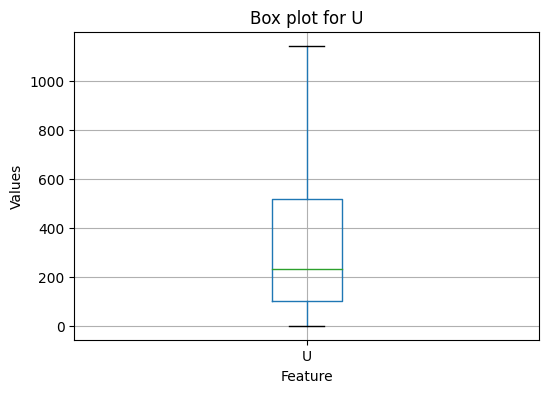

Th float64


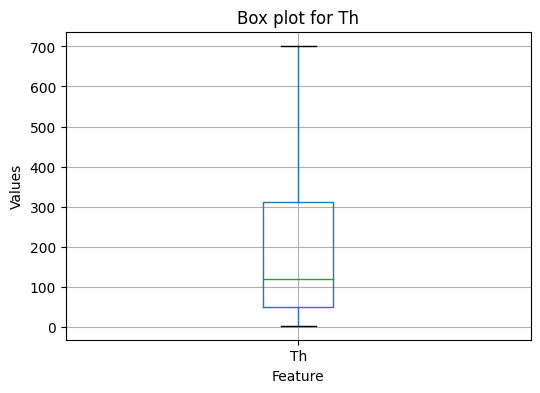

In [560]:
for feature in features_with_outliers:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

### Creating a new cluster ID column replacing latitude and longitude

In [561]:
df1_copy.columns

Index(['age_ma', 'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

### For time being let us consider Agg Cluster ID in our analysis. Replacing latitude and longitude

In [562]:
df1_copy.columns

Index(['age_ma', 'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

### Scatter plot of clustered data points

### Feature Correlation

In [563]:
df1_copy[['Ti', 'La', 'Ce', 'Pr']]

,Ti,La,Ce,Pr
0,7.880000,0.050000,10.500000,0.050000
1,10.900000,0.465619,61.474347,0.701901
2,6.000000,0.020000,25.100000,0.300000
3,9.060000,0.280000,12.000000,0.203500
4,4.930000,0.070000,16.500000,0.150000
...,...,...,...,...
2983,9.728431,0.007000,8.000000,0.051000
2984,9.728431,0.013000,9.000000,0.137000
2985,9.728431,0.015000,9.000000,0.172000
2986,9.728431,0.002000,8.000000,0.039000


In [564]:
# Select only numerical columns
numerical_df = df1.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

print(correlation_matrix)

                 age_ma  Cu_tonnage_Mt   Feature        Ti        La  \
age_ma         1.000000      -0.129115 -0.281490 -0.009842  0.078264   
Cu_tonnage_Mt -0.129115       1.000000  0.663387 -0.034243 -0.077268   
Feature       -0.281490       0.663387  1.000000 -0.053523 -0.133888   
Ti            -0.009842      -0.034243 -0.053523  1.000000  0.022177   
La             0.078264      -0.077268 -0.133888  0.022177  1.000000   
Ce            -0.001615      -0.121575 -0.119423  0.034247  0.729747   
Pr             0.047240      -0.094468 -0.150507  0.051369  0.807826   
Nd             0.084435      -0.098687 -0.148131  0.073581  0.877389   
Sm             0.023324      -0.114771 -0.164237  0.240000  0.515965   
Eu             0.051085      -0.059472 -0.054508  0.038901  0.231784   
Gd            -0.017048      -0.108999 -0.157412  0.260010  0.240827   
Tb            -0.034343      -0.087431 -0.124141  0.272127  0.158421   
Dy            -0.030643      -0.105368 -0.152500  0.274850  0.15

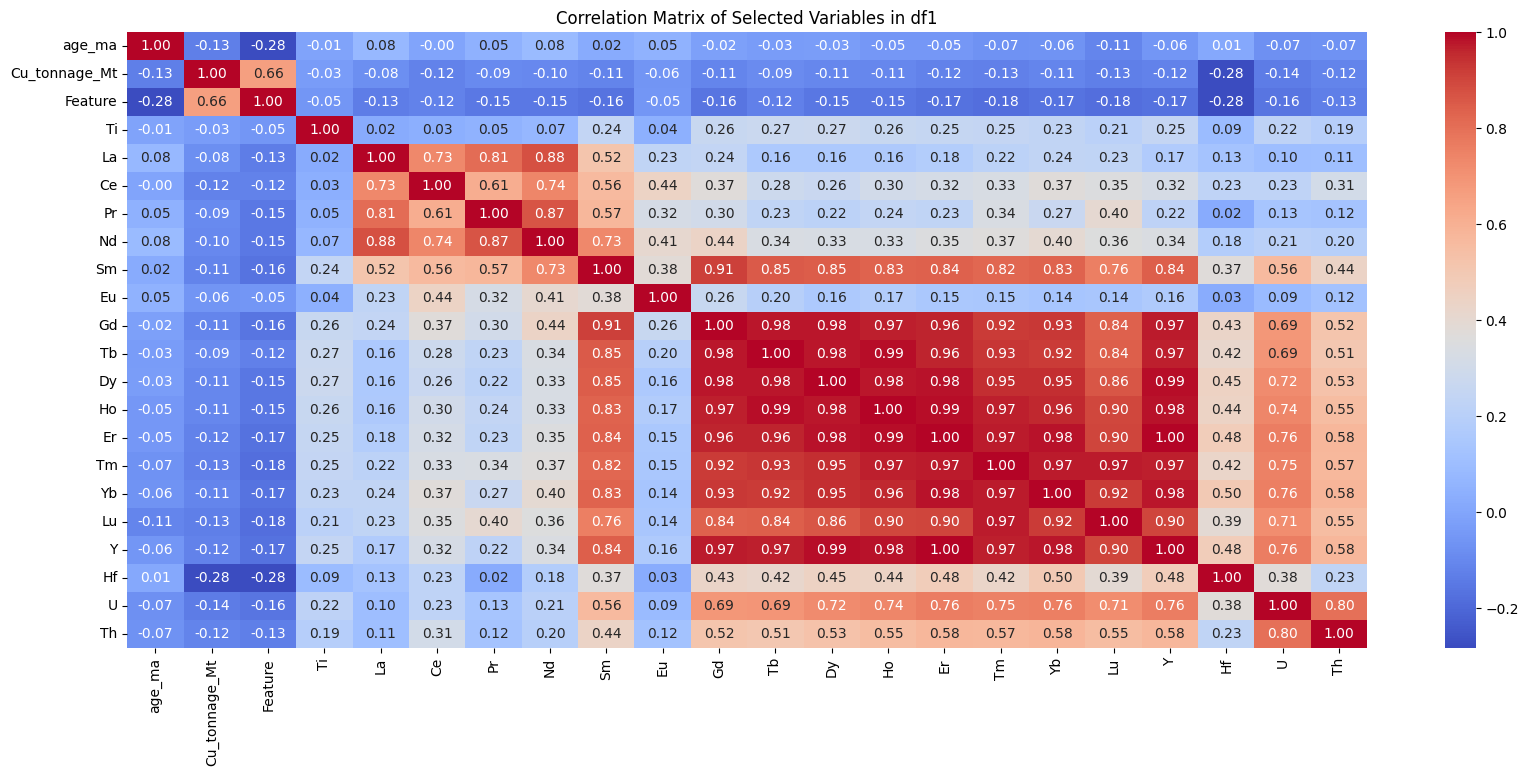

In [565]:
plt.figure(figsize=(20, 8))
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables in df1')
plt.show()

### Sample ML Model testing

In [566]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [567]:
df1_copy.columns

Index(['age_ma', 'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'U', 'Th'],
      dtype='object')

In [568]:
X = df1_copy.drop(columns = ['Comment', 'Feature'])
y = df1_copy['Feature']

In [569]:
X.head()

,age_ma,Cu_tonnage_Mt,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,222.0,0.0,7.88,0.050000,10.500000,0.050000,4.250000,11.600000,1.990000,61.600000,...,259.214141,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12390.0,305.0,134.0
1,222.0,0.0,10.90,0.465619,61.474347,0.701901,7.618805,12.540955,2.637494,63.498619,...,259.214141,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12591.0,503.0,272.0
2,222.0,0.0,6.00,0.020000,25.100000,0.300000,4.410000,12.540955,2.300000,63.498619,...,259.214141,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12724.0,639.0,414.0
3,222.0,0.0,9.06,0.280000,12.000000,0.203500,1.880000,5.080000,1.010000,33.800000,...,194.000000,83.0000,356.00000,89.500000,762.000000,144.000000,1832.000000,12894.0,308.0,127.0
4,222.0,0.0,4.93,0.070000,16.500000,0.150000,2.320000,8.230000,1.520000,45.600000,...,257.000000,106.1375,434.18329,97.083086,936.000000,171.000000,2355.000000,12535.0,348.0,155.0


In [570]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Feature, dtype: int64

In [571]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [572]:
type(X_train)

pandas.core.frame.DataFrame

In [573]:
y_train.shape

(2390,)

In [574]:
y_train.sum()

1027

### Perform scaling

In [575]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Logistic Regression Model

In [576]:
lr_model = LogisticRegression()

In [577]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [578]:
y_pred = lr_model.predict(X_test_scaled)

In [579]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [580]:
accuracy_score(y_test, y_pred)

0.979933110367893

In [581]:
cm = confusion_matrix(y_test, y_pred)

In [582]:
cm

array([[324,   0],
       [ 12, 262]])

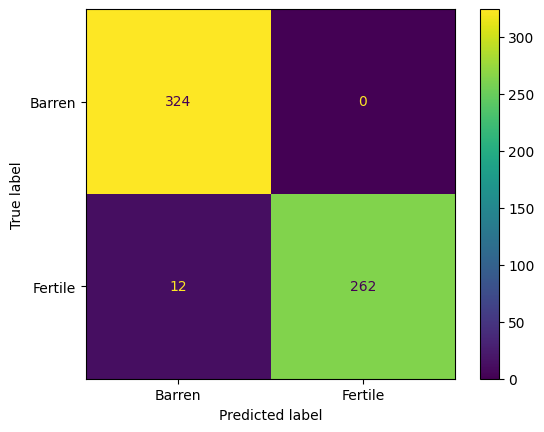

In [583]:
ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

In [584]:
target_names = ['Barren', 'Fertility']

report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report)

              precision    recall  f1-score   support

      Barren     0.9643    1.0000    0.9818       324
   Fertility     1.0000    0.9562    0.9776       274

    accuracy                         0.9799       598
   macro avg     0.9821    0.9781    0.9797       598
weighted avg     0.9806    0.9799    0.9799       598



## Feature Importance and Selection

### Recurssive Feature Elimination

In [585]:
from sklearn.feature_selection import RFE

# Initialize Logistic Regression model
lr_model = LogisticRegression()

# Initialize RFE
rfe = RFE(lr_model, n_features_to_select=1)

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Rank': rfe.ranking_})
feature_ranking.sort_values(by='Rank')


,Feature,Rank
1,Cu_tonnage_Mt,1
14,Tm,2
16,Lu,3
17,Y,4
11,Dy,5
7,Sm,6
8,Eu,7
3,La,8
15,Yb,9
0,age_ma,10


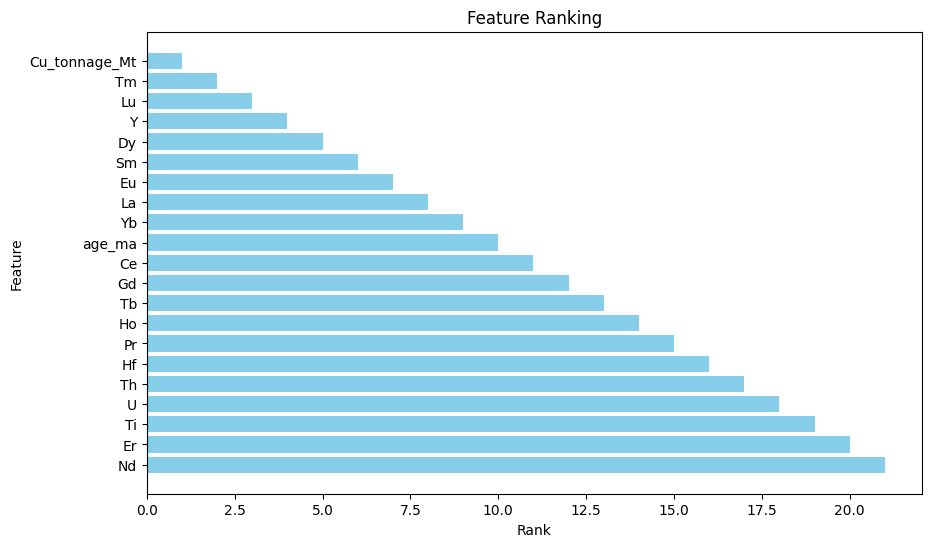

In [586]:
import matplotlib.pyplot as plt

# Sort the feature ranking dataframe by rank
sorted_feature_ranking = feature_ranking.sort_values(by='Rank')

# Plotting the feature ranking
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_ranking['Feature'], sorted_feature_ranking['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rank at the top
plt.show()


### Random Forest Feature Importance

In [587]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit Random Forest
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False)


,Feature,Importance
1,Cu_tonnage_Mt,0.540459
3,La,0.101174
11,Dy,0.039747
6,Nd,0.036667
5,Pr,0.036428
0,age_ma,0.035196
7,Sm,0.031958
19,U,0.026883
8,Eu,0.026449
18,Hf,0.023662


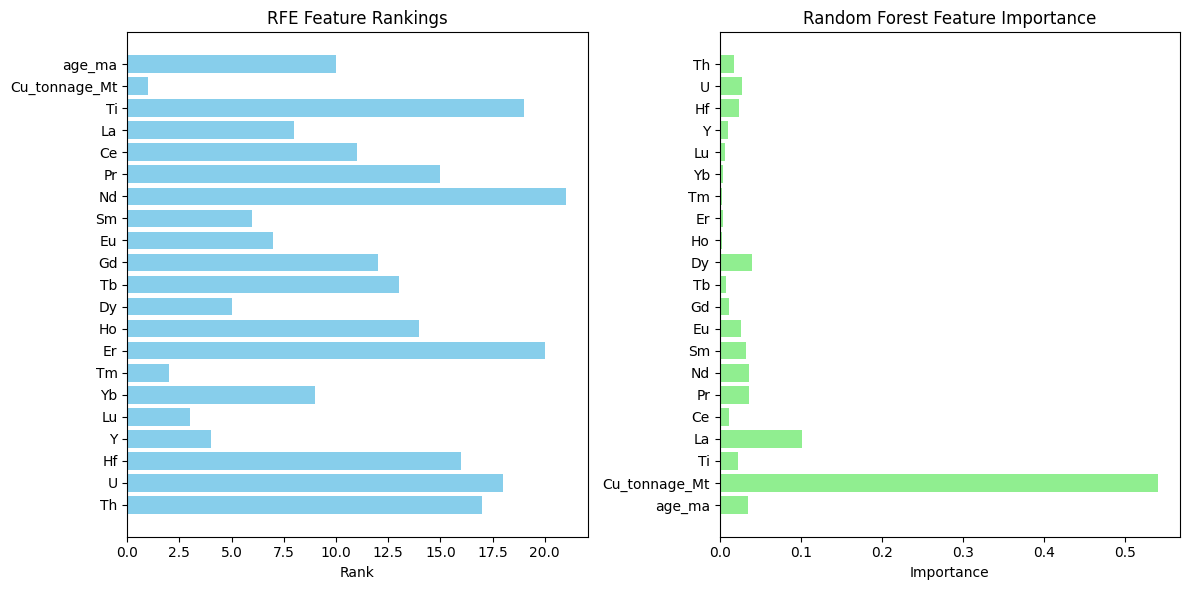

In [588]:
import matplotlib.pyplot as plt

# Merge feature rankings and importances
merged_features = pd.merge(feature_ranking, feature_importances, on='Feature', how='inner')

# Plotting
plt.figure(figsize=(12, 6))

# Plotting RFE rankings
plt.subplot(1, 2, 1)
plt.barh(merged_features['Feature'], merged_features['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.title('RFE Feature Rankings')
plt.gca().invert_yaxis()

# Plotting feature importances
plt.subplot(1, 2, 2)
plt.barh(merged_features['Feature'], merged_features['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()


## Logistic Regression Model implemenation using important features

In [589]:
# Select important features based on importance scores
important_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']




In [590]:
# Filter the dataset to include only important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]



In [591]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)



In [592]:
# Train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)



LogisticRegression()

In [593]:
# Make predictions
y_pred = lr_model.predict(X_test_scaled)



In [594]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)



In [595]:
# Display confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[324   0]
 [ 11 263]]

Accuracy: 0.9816053511705686


In [596]:
conf_matrix

array([[324,   0],
       [ 11, 263]])

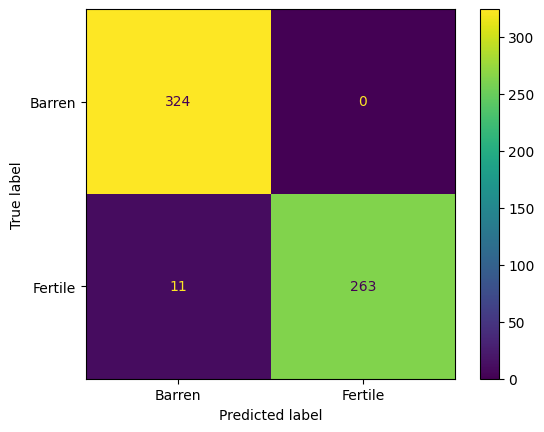

In [597]:
ConfusionMatrixDisplay(conf_matrix, display_labels=['Barren', 'Fertile']).plot()